## StatsModels
`statsmodels` is a Python package that provides classes and functions for fitting many different statistical models, for performing statistical tests, and carrying out data exploration.

The functionality of statsmodels is accessed through its api as shown below.


In [1]:
import statsmodels.api as sm

### Datasets

The `datasets` module of  statsmodels api provides data sets,including meta-data, for use in examples and for practiceing various tools in the package.

The list of available datasets can be obtained by `__all__` attribute as shown below. 

In [2]:
sm.datasets.__all__

['anes96',
 'cancer',
 'committee',
 'ccard',
 'copper',
 'cpunish',
 'elnino',
 'engel',
 'grunfeld',
 'interest_inflation',
 'longley',
 'macrodata',
 'modechoice',
 'nile',
 'randhie',
 'scotland',
 'spector',
 'stackloss',
 'star98',
 'strikes',
 'sunspots',
 'fair',
 'heart',
 'statecrime',
 'co2',
 'fertility',
 'china_smoking',
 'get_rdataset',
 'get_data_home',
 'clear_data_home',
 'webuse',
 'check_internet',
 'test',
 'danish_data']

Alternatively, it can aslo be seen through `dir` function.

Each dataset is provided through a separate python module of its own.

In [3]:
dir(sm.datasets)

['PytestTester',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'anes96',
 'cancer',
 'ccard',
 'check_internet',
 'china_smoking',
 'clear_data_home',
 'co2',
 'committee',
 'copper',
 'cpunish',
 'danish_data',
 'elnino',
 'engel',
 'fair',
 'fertility',
 'get_data_home',
 'get_rdataset',
 'grunfeld',
 'heart',
 'interest_inflation',
 'longley',
 'macrodata',
 'modechoice',
 'nile',
 'randhie',
 'scotland',
 'spector',
 'stackloss',
 'star98',
 'statecrime',
 'strikes',
 'sunspots',
 'test',
 'utils',
 'webuse']

In [4]:
type(sm.datasets.heart)

module

The description of data can be seen through the string objects `DESCRSHORT` and `DESCRLONG`. The `DESCRLONG` is designed to be `print`ed.

In [5]:
print(sm.datasets.heart.DESCRLONG)

This data contains the survival time after receiving a heart transplant, the age of the patient and whether or not the survival time was censored.



A dataset can be loaded using the `load_pandas` function.

In [6]:
heart = sm.datasets.heart.load_pandas()

Here `heart` is a `Dataset` object. The DataFrame/Series is available as `data` attribute of the Dataset object.

In [7]:
heart.data

,survival,censors,age
0,15.0,1.0,54.3
1,3.0,1.0,40.4
2,624.0,1.0,51.0
3,46.0,1.0,42.5
4,127.0,1.0,48.0
...,...,...,...
64,14.0,1.0,40.3
65,167.0,0.0,26.7
66,110.0,0.0,23.7
67,13.0,0.0,28.9


`names` attribute of the Dataset object returns the list of variables in the Dataset.

In [8]:
heart.names

['survival', 'censors', 'age']

**HW:** Explore other attributes/ methods of the `Dataset` object.

### Getting R Datasets

The `datasets` module provides `get_rdataset` function to get an R dataset from [RDatasets Project](<https://vincentarelbundock.github.io/Rdatasets/>). The functon returns the requested R dataset as a `Dataset` object.

If the dataset being requested is a part of `datasets` package of R, it can be requested as shown below.

In [9]:
Orange = sm.datasets.get_rdataset('Orange')

The help on the dataset, as available in R, can be seen through pythons help system (`Orange?`).

The dataset, as a DataFrame object, is available through `data` attribute.

In [10]:
Orange.data.head()

,Tree,age,circumference
0,1,118,30
1,1,484,58
2,1,664,87
3,1,1004,115
4,1,1231,120


If the dataset being requested is a part of a contributed package, it can be requested as shown below.

In [11]:
road = sm.datasets.get_rdataset('road', 'MASS')
road.data.head()

,deaths,drivers,popden,rural,temp,fuel
Alabama,968,158,64.0,66.0,62,119.0
Alaska,43,11,0.4,5.9,30,6.2
Arizona,588,91,12.0,33.0,64,65.0
Arkanas,640,92,34.0,73.0,51,74.0
Calif,4743,952,100.0,118.0,65,105.0


## OLS Regression

In [12]:
iris = sm.datasets.get_rdataset('iris')

In [13]:
iris.data.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [14]:
irisData = iris.data
irisData.columns = ['SL', 'SW', 'PL', 'PW', 'SP']
model = sm.OLS(irisData.PL, sm.add_constant(irisData.SL))
lmfit = model.fit()
lmfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PL   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           1.04e-47
Time:                        21:24:33   Log-Likelihood:                -190.57
No. Observations:                 150   AIC:                             385.1
Df Residuals:                     148   BIC:                             391.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1014      0.507    -14.016      0.000      -8.103      -6.100
SL             1.8584      0.086     21.646      0.000       1.689       2.028
==============================================================================
Omnibus:                        0.253   Durbin-Watson:                   1.204
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.386
Skew:                          -0.082   Prob(JB):                        0.824
Kurtosis:                       2.812   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## OLS Regression using model formula

An alternative method to fit the above model using *model formula* is shown below.

In [15]:
import statsmodels.formula.api as smf
model2=smf.ols("PL~SL", irisData)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PL   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           1.04e-47
Time:                        21:24:33   Log-Likelihood:                -190.57
No. Observations:                 150   AIC:                             385.1
Df Residuals:                     148   BIC:                             391.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.1014      0.507    -14.016      0.000      -8.103      -6.100
SL             1.8584      0.086     21.646      0.000       1.689       2.028
==============================================================================
Omnibus:                        0.253   Durbin-Watson:                   1.204
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.386
Skew:                          -0.082   Prob(JB):                        0.824
Kurtosis:                       2.812   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
sm.stats.anova_lm(result2) # Works only when model formula is used

,df,sum_sq,mean_sq,F,PR(>F)
SL,1.0,352.866245,352.866245,468.550154,1.038667e-47
Residual,148.0,111.459155,0.753102,NaN,NaN


Matplotlib is building the font cache; this may take a moment.
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\regressionplots.py:156: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  ax.plot(x1, results.fittedvalues[x1_argsort], 'D', color='r',


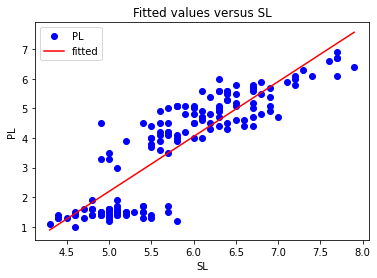

In [17]:
fig = sm.graphics.plot_fit(result2, 'SL', vlines = False, linestyle = '-', marker = '')

To `plot_fit` function, any argument can be supplied that specifies a property of `Line2D` object.